<a href="https://colab.research.google.com/github/MuhammadTanveerm/K-Means-Clustering/blob/main/Kr_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import  Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline


Dataset

(1000, 2)


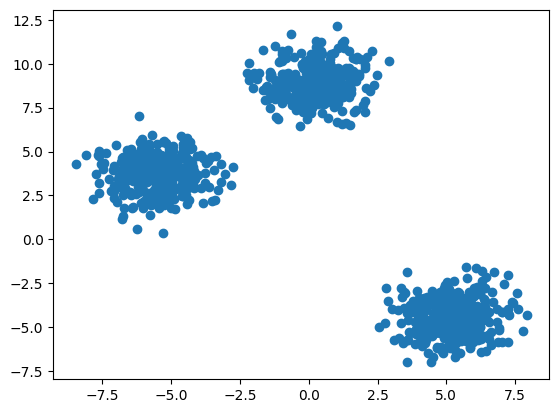

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
print(X.shape)
plt.scatter(X[:,0],X[:,1])

Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


Implement K-Means Clustring

In [5]:
from sklearn.cluster import KMeans

wcss =[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init ='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)


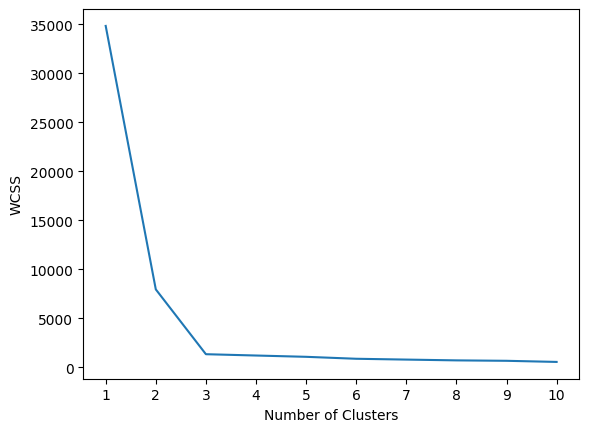

In [6]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.show()

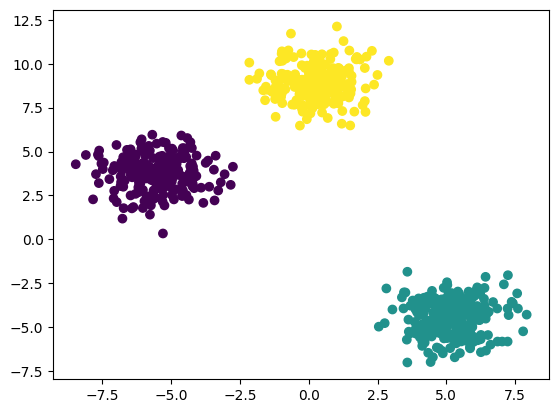

In [7]:
kmeans =KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1],c= y_labels)
plt.show()

In [8]:
y_test_label= kmeans.predict(X_test)

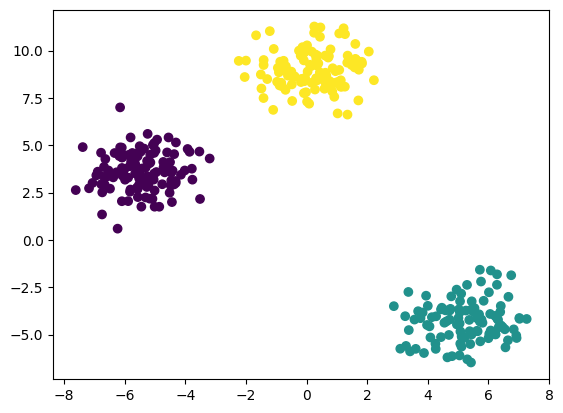

In [9]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_label)
plt.show()

Find Best Centroind using Kneed Library

In [11]:
#Kneed Library
!pip install kneed

In [12]:
from kneed import KneeLocator
Kl= KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
Kl.elbow

np.int64(3)

Checking Performance Using  (silhouette_score)

In [15]:
#Performance Matrics
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_coefficients =[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)

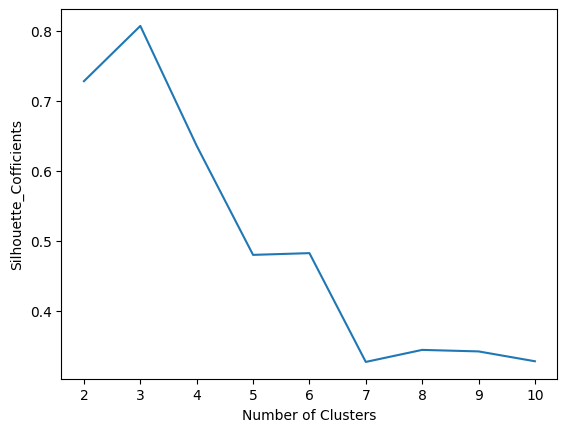

In [18]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Cofficients")
plt.show()